# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subsection 1

In [2]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

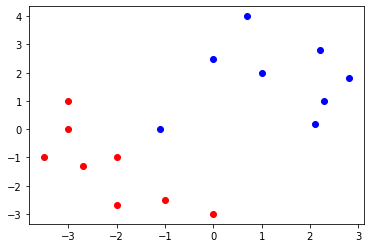

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [4]:
print(X)
print(y)

[[-3.5 -1. ]
 [-3.   0. ]
 [-3.   1. ]
 [-2.7 -1.3]
 [-2.  -1. ]
 [-2.  -2.7]
 [-1.  -2.5]
 [ 0.  -3. ]
 [-1.1  0. ]
 [ 0.   2.5]
 [ 1.   2. ]
 [ 0.7  4. ]
 [ 2.1  0.2]
 [ 2.3  1. ]
 [ 2.8  1.8]
 [ 2.2  2.8]]
[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]


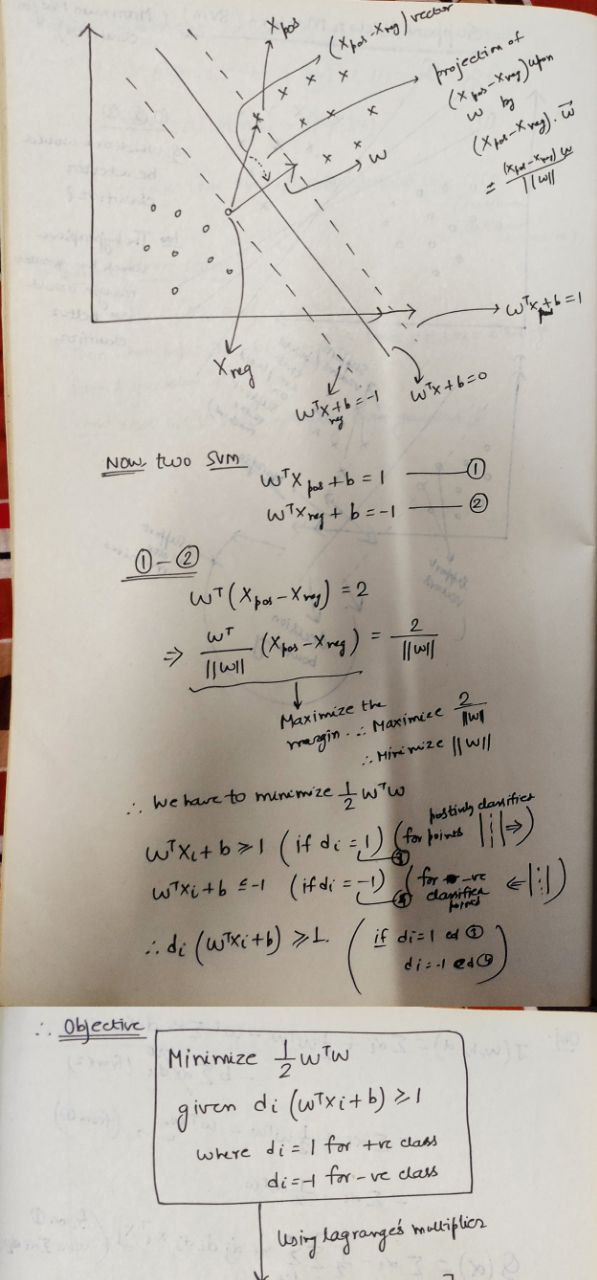


In [ ]:
# Write your code here

In [5]:
import cvxpy as cp

# Create two scalar optimization variables.
# w = cp.Variable(2); b = cp.Variable()

m, n = np.shape(X)
print([m, n])

w = cp.Variable(n) # weight matrix
b = cp.Variable() # bias term

# Form objective.
# https://stackoverflow.com/questions/73833398/cvxpy-the-objective-is-not-dcp
# objective = cp.Minimize((1/2)*(w.T @ w)) # DCPError: Problem does not follow DCP rules. Specifically:The objective is not DCP. Its following subexpressions are not: var4974 @ var4974
objective = cp.Minimize((1/2)*cp.sum_squares(w)) # minimize (1/2) * wTw
print(objective)

# Create constraints.
constraint_list = []

for i in range(len(X)):
  # constraint_list += [(y[i] * (w.T @ X[i] + b) >= 1)]
  constraint_list.append((y[i] * (w.T @ X[i] + b) >= 1))
print(constraint_list)

# Form and solve problem.
prob = cp.Problem(objective, constraint_list)
print(prob)
prob.solve()

print("w = " + str(w.value))
print("b = " + str(b.value))

[16, 2]
minimize 0.5 @ quad_over_lin(var1, 1.0)
[Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ()))]
minimize 0.5 @ quad_over_lin(var1, 1.0)
subject to 1.0 <= 1.0 @ (var1 @ [-3.5 -1. ] + var2)
           1.0 <= 1.0 @ (var1 @ [-3.  0.] + var2)
           1.0 <= 1.0 @ (

In [6]:
print("w = " + str(w.value))
print("b = " + str(b.value))

w = [-1.73913043 -1.30434783]
b = -2.91304347826087


In [7]:
slope = -(w.value[0]/w.value[1])
print("slope: " + str(slope))

slope: -1.3333333333333333


In [8]:
intercept = -(b.value/w.value[1])
print("intercept: " + str(intercept))

intercept: -2.2333333333333343


In [9]:
x_val = []
y_val = []

for i in range(len(X)):
  x_val.append(X[i][0])
  y_hat = slope * x_val[i] + intercept
  y_val.append(y_hat)

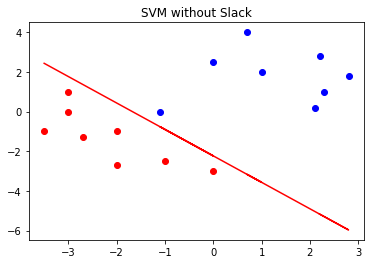

In [10]:
plt.title("SVM without Slack")
plt.plot(x_val, y_val, color='red')
plot_points(X, y)
plt.show()

In [ ]:
# # Method-2
# w = cp.Variable(2); b = cp.Variable()
# obj = 0
# for i in range(len(X)):
#   if(y[i] == 1):
#     obj += cp.pos(1 - (w.T @ X[i] + b))
#   else:
#     obj += cp.pos(1 + (w.T @ X[i] + b))
# cp.Problem(cp.Minimize(obj), []).solve()
# print(w.value)
# print(b.value)

[-2.17943139 -1.67268697]
-3.5836843353627454


In [ ]:
## Method 3
# import cvxpy as cp

# m, n = np.shape(X)
# print([m, n])

# w = cp.Variable(n) # weight matrix
# epsilon = cp.Variable(m) # slack variable
# b = cp.Variable() # bias term

# objective = cp.Minimize(0.5 * cp.square(cp.norm(w))) # Minimize 1/2 * wTw
# constraint = [(cp.matmul(y, X@w + b)) >= 1] # (yi * (wTx + b)) >= 1 for all i
# prob = cp.Problem(objective, constraint)
# print(prob)
# prob.solve()

# print("Status of optimization: " + str(prob.status))
# print("Optimal value of w: " + str(w.value))
# print("Optimal value of b: " + str(b.value))

In [ ]:
# x_val = []
# y_val = []

# for i in range(len(X)):
#   x_val.append(X[i][0])
#   y_hat = slope * x_val[i] + intercept
#   y_val.append(y_hat)

In [ ]:
# plt.plot(x_val, y_val, color='red')
# plot_points(X, y)
# plt.show()

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [ ]:
# Write your code here

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points

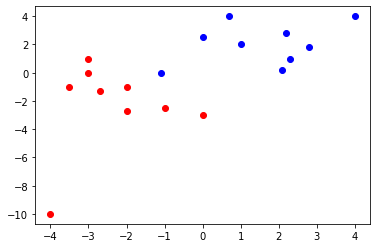

In [11]:
# Create Synthetic Data and visualize the points
X_new = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-4,-10], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8], [4,4]])
y_new = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X_new, y_new)
plt.show()

In [ ]:
# Solve for the decision boundary using this modified dataset

In [12]:
import cvxpy as cp

def svm_hard_margin(X, y):

    # Create two scalar optimization variables.
    # w = cp.Variable(2); b = cp.Variable()

    m, n = np.shape(X)
    print([m, n])

    w = cp.Variable(n) # weight matrix
    b = cp.Variable() # bias term

    # Form objective.
    # https://stackoverflow.com/questions/73833398/cvxpy-the-objective-is-not-dcp
    # objective = cp.Minimize((1/2)*(w.T @ w)) # DCPError: Problem does not follow DCP rules. Specifically:The objective is not DCP. Its following subexpressions are not: var4974 @ var4974
    objective = cp.Minimize((1/2)*cp.sum_squares(w)) # minimize (1/2) * wTw
    print(objective)

    # Create constraints.
    constraint_list = []

    for i in range(len(X)):
      # constraint_list += [(y[i] * (w.T @ X[i] + b) >= 1)]
      constraint_list.append((y[i] * (w.T @ X[i] + b) >= 1))
    print(constraint_list)

    # Form and solve problem.
    prob = cp.Problem(objective, constraint_list)
    print(prob)
    prob.solve()

    print("w = " + str(w.value))
    print("b = " + str(b.value))

    return w, b

In [13]:
import cvxpy as cp

def svm_soft_margin(X, y, C):
  m, n = np.shape(X)

  # Create two scalar optimization variables.
  w = cp.Variable(n) # n = 2 here
  b = cp.Variable()
  epsilon = cp.Variable(m) # m = no. of datapoints 
  # C = 200

  # Form objective.
  # https://stackoverflow.com/questions/73833398/cvxpy-the-objective-is-not-dcp
  # objective = cp.Minimize((1/2)*(w.T @ w)) # DCPError: Problem does not follow DCP rules. Specifically:The objective is not DCP. Its following subexpressions are not: var4974 @ var4974
  objective = cp.Minimize((1/2)*cp.sum_squares(w) + C*cp.sum(epsilon)) # minimize (1/2) * wTw
  print(objective)

  # Create constraints.
  constraint_list = []

  for i in range(len(X)):
    # constraint_list += [(y[i] * (w.T @ X[i] + b) >= 1)]
    constraint_list.append(y[i] * (w.T @ X[i] + b) >= 1-epsilon[i])
    constraint_list.append(epsilon[i]>=0)
  print(constraint_list)

  # Form and solve problem.
  prob = cp.Problem(objective, constraint_list)
  print(prob)
  prob.solve()

  print("w = " + str(w.value))
  print("b = " + str(b.value))

  return w, b, epsilon

In [14]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points_with_decision_boundary(X, Y, x_val, y_val, title):
  reds = []
  blues = []
  for i in range(Y.shape[0]):
      if Y[i] == 1:
          reds.append(X[i])
      else:
          blues.append(X[i])
  reds = np.array(reds)
  blues = np.array(blues)
  plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
  plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
  plt.title(title)
  plt.plot(x_val, y_val, color='green')
  plt.show()

***Hard Margin***

In [15]:
C = 0.01
w, b = svm_hard_margin(X_new, y_new)

[18, 2]
minimize 0.5 @ quad_over_lin(var265, 1.0)
[Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ()))]
minimize 0.5 @ quad_over_lin(var265, 1.0)
subject to 1.0 <= 1.0 @ (

In [16]:
print("w = " + str(w.value))
print("b = " + str(b.value))

w = [-1.73913043 -1.30434783]
b = -2.9130434782608705


In [17]:
slope = -(w.value[0]/w.value[1])
print("slope: " + str(slope))
intercept = -(b.value/w.value[1])
print("intercept: " + str(intercept))

slope: -1.3333333333333333
intercept: -2.2333333333333334


In [18]:
x_val = []
y_val = []

for i in range(len(X_new)):
  x_val.append(X_new[i][0])
  y_hat = slope * x_val[i] + intercept
  y_val.append(y_hat)

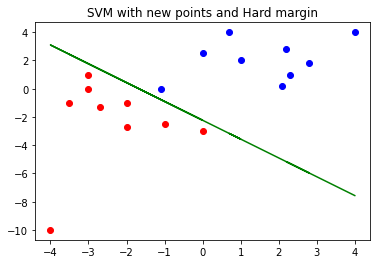

In [19]:
plot_points_with_decision_boundary(X_new, y_new, x_val, y_val, "SVM with new points and Hard margin")

**Observation**<br>

Yeah, the decision boundary has altered, and now that we can see that it might not function effectively on the testing data owing to a single outlier point, we need to incorporate a softening of the decision border in the form of Slack.

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [ ]:
# Write your code here for C= 0.01

In [20]:
C = 0.01
w, b, _ = svm_soft_margin(X_new, y_new, C)

minimize 0.5 @ quad_over_lin(var561, 1.0) + 0.01 @ Sum(var563, None, False)
[Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequali

In [21]:
print("w = " + str(w.value))
print("b = " + str(b.value))

w = [-0.22506809 -0.19858949]
b = 0.013672178988326457


In [22]:
slope = -(w.value[0]/w.value[1])
print("slope: " + str(slope))
intercept = -(b.value/w.value[1])
print("intercept: " + str(intercept))

slope: -1.1333333333333346
intercept: 0.06884643644378939


In [23]:
x_val = []
y_val = []

for i in range(len(X_new)):
  x_val.append(X_new[i][0])
  y_hat = slope * x_val[i] + intercept
  y_val.append(y_hat)

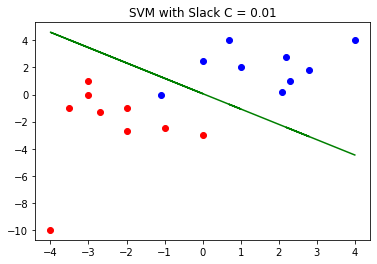

In [24]:
plot_points_with_decision_boundary(X_new, y_new, x_val, y_val, "SVM with Slack C = 0.01")

In [ ]:
# Write your code here for C= 0.1

In [25]:
C = 0.1
w, b, _ = svm_soft_margin(X_new, y_new, C)

minimize 0.5 @ quad_over_lin(var1188, 1.0) + 0.1 @ Sum(var1190, None, False)
[Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequal

In [26]:
print("w = " + str(w.value))
print("b = " + str(b.value))

w = [-0.38493724 -0.35146444]
b = -0.12133891213389113


In [27]:
slope = -(w.value[0]/w.value[1])
print("slope: " + str(slope))
intercept = -(b.value/w.value[1])
print("intercept: " + str(intercept))

slope: -1.0952380952380951
intercept: -0.345238095238095


In [28]:
x_val = []
y_val = []

for i in range(len(X_new)):
  x_val.append(X_new[i][0])
  y_hat = slope * x_val[i] + intercept
  y_val.append(y_hat)

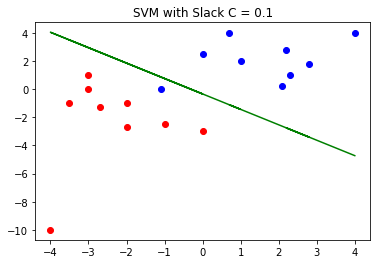

In [29]:
plot_points_with_decision_boundary(X_new, y_new, x_val, y_val, "SVM with Slack C = 0.1")

In [ ]:
# Write your code here for C= 3

In [30]:
C = 3
w, b, _ = svm_soft_margin(X_new, y_new, C)

minimize 0.5 @ quad_over_lin(var1815, 1.0) + 3.0 @ Sum(var1817, None, False)
[Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequal

In [31]:
print("w = " + str(w.value))
print("b = " + str(b.value))

w = [-1.73913043 -1.30434783]
b = -2.913043478260871


In [32]:
slope = -(w.value[0]/w.value[1])
print("slope: " + str(slope))
intercept = -(b.value/w.value[1])
print("intercept: " + str(intercept))

slope: -1.3333333333333333
intercept: -2.2333333333333334


In [33]:
x_val = []
y_val = []

for i in range(len(X_new)):
  x_val.append(X_new[i][0])
  y_hat = slope * x_val[i] + intercept
  y_val.append(y_hat)

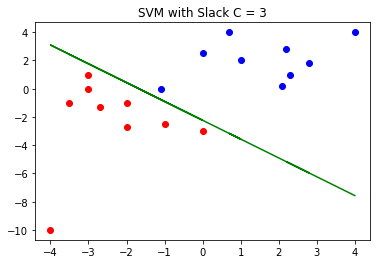

In [34]:
plot_points_with_decision_boundary(X_new, y_new, x_val, y_val, "SVM with Slack C = 3")

In [ ]:
# Write your code here for C= 10

In [35]:
C = 10
w, b, _ = svm_soft_margin(X_new, y_new, C)

minimize 0.5 @ quad_over_lin(var2442, 1.0) + 10.0 @ Sum(var2444, None, False)
[Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequa

In [36]:
print("w = " + str(w.value))
print("b = " + str(b.value))

w = [-1.73913043 -1.30434783]
b = -2.913043478260871


In [37]:
slope = -(w.value[0]/w.value[1])
print("slope: " + str(slope))
intercept = -(b.value/w.value[1])
print("intercept: " + str(intercept))

slope: -1.3333333333333333
intercept: -2.2333333333333334


In [38]:
x_val = []
y_val = []

for i in range(len(X_new)):
  x_val.append(X_new[i][0])
  y_hat = slope * x_val[i] + intercept
  y_val.append(y_hat)

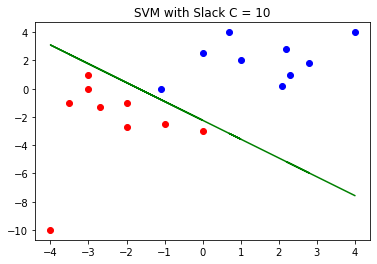

In [39]:
plot_points_with_decision_boundary(X_new, y_new, x_val, y_val, "SVM with Slack C = 10")

In [ ]:
# Write your code here for C= 100

In [40]:
C = 100
w, b, epsilon = svm_soft_margin(X_new, y_new, C)

minimize 0.5 @ quad_over_lin(var3069, 1.0) + 100.0 @ Sum(var3071, None, False)
[Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequ

In [41]:
print("w = " + str(w.value))
print("b = " + str(b.value))

w = [-1.73913043 -1.30434783]
b = -2.913043478260871


In [42]:
slope = -(w.value[0]/w.value[1])
print("slope: " + str(slope))
intercept = -(b.value/w.value[1])
print("intercept: " + str(intercept))

slope: -1.3333333333333333
intercept: -2.2333333333333334


In [43]:
x_val = []
y_val = []

for i in range(len(X_new)):
  x_val.append(X_new[i][0])
  y_hat = slope * x_val[i] + intercept
  y_val.append(y_hat)

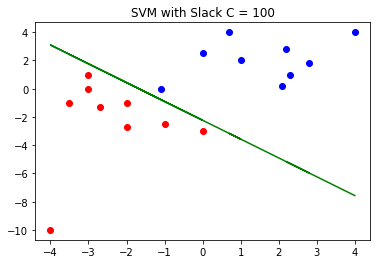

In [44]:
plot_points_with_decision_boundary(X_new, y_new, x_val, y_val, "SVM with Slack C = 100")

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

In [45]:
print(X_new)
print(y_new)

[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -4.  -10. ]
 [ -1.1   0. ]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [  4.    4. ]]
[ 1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
# Write your Code here

In [46]:
w_100 = w.value
b_100 = b.value
epsilon_100 = epsilon.value

In [48]:
from math import isclose
support_vec_index = []
for i in range(X_new.shape[0]):
    if(isclose(y_new[i]*(w_100.T @ X_new[i]+b_100),1-epsilon_100[i])):
        print(i)
        support_vec_index.append(i)

2
7
9


In [49]:
print(support_vec_index)

[2, 7, 9]


In [50]:
# Write your Code here
X_sv_removed = np.delete(X_new,support_vec_index,axis=0)
y_sv_removed = np.delete(y_new,support_vec_index,axis=0)

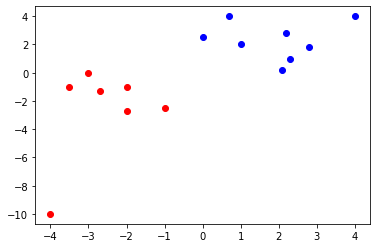

In [51]:
plot_points(X_sv_removed, y_sv_removed)
plt.show()

In [ ]:
# # Here support vectors are (-3,1) -> 1, (0,-3) -> 1, (-1.1,0) -> -1
# # Removing them from X and y
# X_new = np.array([[-3.5, -1], [-3, 0], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
#               [-1, -2.5], [0, 2.5], [1, 2], [0.7, 4], 
#               [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
# y_new = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

# plot_points(X_new, y_new)
# plt.show()

In [52]:
C = 100
w, b, _ = svm_soft_margin(X_sv_removed, y_sv_removed, C)

minimize 0.5 @ quad_over_lin(var3696, 1.0) + 100.0 @ Sum(var3698, None, False)
[Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequ

In [53]:
print("w = " + str(w.value))
print("b = " + str(b.value))

w = [-0.38493724 -0.35146444]
b = -0.12133891213389121


***So, we can see that w,b changes after removing support vectors***

In [54]:
slope = -(w.value[0]/w.value[1])
print("slope: " + str(slope))
intercept = -(b.value/w.value[1])
print("intercept: " + str(intercept))

slope: -1.0952380952380956
intercept: -0.3452380952380953


In [55]:
x_val = []
y_val = []

for i in range(len(X_sv_removed)):
  x_val.append(X_sv_removed[i][0])
  y_hat = slope * x_val[i] + intercept
  y_val.append(y_hat)

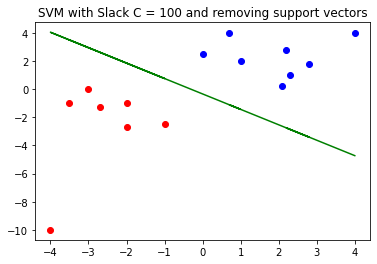

In [56]:
plot_points_with_decision_boundary(X_sv_removed, y_sv_removed, x_val, y_val, "SVM with Slack C = 100 and removing support vectors")

**Observation**<br>
So, we can see that decision boundary changes after removing support vectors

### Subsection 2

In [57]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-26 06:41:38--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.03s   

2023-03-26 06:41:38 (305 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-26 06:41:38--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [58]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [59]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [60]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [61]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


***Linear Kernel***

In [63]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
# predict
predictions = svm_linear.predict(X_test)
predictions[:10]

array([6, 9, 8, 1, 2, 1, 9, 5, 9, 7], dtype=uint8)

In [71]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
print("Confusion Matrix in Linear SVM")
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

Confusion Matrix in Linear SVM


array([[288,   0,   4,   0,   1,   1,   1,   1,   1,   0],
       [  0, 339,   1,   2,   0,   1,   2,   1,   0,   0],
       [  3,   5, 286,   6,   4,   0,   1,   4,   3,   0],
       [  3,   2,   8, 237,   0,  18,   0,   3,   5,   3],
       [  1,   1,   5,   0, 250,   0,   3,   1,   0,  20],
       [  3,   2,   1,  14,   1, 226,   2,   3,  11,   2],
       [  6,   0,   8,   0,   7,   6, 260,   2,   1,   0],
       [  0,   4,  10,   5,   2,   0,   1, 259,   2,  20],
       [  4,   3,   2,  13,   6,  19,   3,   2, 245,   4],
       [  2,   5,   3,   7,  18,   1,   0,  11,   1, 278]])

In [68]:
# measure accuracy
print("Accuracy in Linear SVM: " + str(metrics.accuracy_score(y_true=y_test, y_pred=predictions)))

Accuracy in Linear SVM: 0.8893333333333333


In [70]:
# class-wise accuracy
print("Metrics report in Linear SVM")
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

Metrics report in Linear SVM
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



***Polynomial Kernel***

In [77]:
from sklearn import svm
from sklearn import metrics

# rbf kernel with other hyperparameters kept to default 
svm_polynomial = svm.SVC(kernel='poly')
svm_polynomial.fit(X_train, y_train)

SVC(kernel='poly')

In [78]:
# predict
predictions = svm_polynomial.predict(X_test)
predictions[:10]

array([6, 9, 8, 1, 2, 1, 9, 5, 9, 7], dtype=uint8)

In [79]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
print("Confusion Matrix in Polynomial SVM")
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

Confusion Matrix in Polynomial SVM


array([[278,   2,   1,   0,   0,   9,   4,   1,   2,   0],
       [  0, 342,   1,   2,   0,   0,   1,   0,   0,   0],
       [  1,   8, 286,   4,   3,   0,   1,   6,   2,   1],
       [  0,   6,   6, 249,   0,   9,   0,   4,   5,   0],
       [  1,   4,   1,   0, 260,   0,   4,   0,   0,  11],
       [  1,   3,   0,   7,   1, 241,   3,   2,   5,   2],
       [  6,   2,   1,   0,   5,   2, 274,   0,   0,   0],
       [  0,  10,   5,   0,   4,   0,   1, 265,   1,  17],
       [  1,   1,   1,   8,   6,   7,   0,   3, 271,   3],
       [  0,   7,   0,   4,  22,   2,   0,   4,   1, 286]])

In [75]:
# measure accuracy
print("Accuracy in Polynomial SVM: " + str(metrics.accuracy_score(y_true=y_test, y_pred=predictions)))


Accuracy in Polynomial SVM: 0.9173333333333333


In [76]:
# class-wise accuracy
print("Metrics report in Polynomial SVM")
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

Metrics report in Polynomial SVM
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       297
           1       0.89      0.99      0.94       346
           2       0.95      0.92      0.93       312
           3       0.91      0.89      0.90       279
           4       0.86      0.93      0.89       281
           5       0.89      0.91      0.90       265
           6       0.95      0.94      0.95       290
           7       0.93      0.87      0.90       303
           8       0.94      0.90      0.92       301
           9       0.89      0.88      0.89       326

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



***RBF Kernel***

In [80]:
from sklearn import svm
from sklearn import metrics

# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [81]:
# predict
predictions = svm_rbf.predict(X_test)
predictions[:10]

array([6, 9, 8, 1, 2, 1, 9, 5, 9, 7], dtype=uint8)

In [82]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
print("Confusion Matrix in RBF kernel SVM")
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

Confusion Matrix in RBF kernel SVM


array([[293,   0,   1,   0,   1,   1,   1,   0,   0,   0],
       [  0, 339,   2,   2,   0,   1,   1,   1,   0,   0],
       [  0,   0, 298,   5,   2,   0,   1,   3,   3,   0],
       [  1,   0,   5, 256,   0,   9,   0,   4,   4,   0],
       [  1,   1,   2,   0, 267,   0,   3,   0,   0,   7],
       [  2,   1,   0,   7,   0, 248,   3,   1,   1,   2],
       [  5,   0,   5,   0,   3,   5, 272,   0,   0,   0],
       [  0,   6,   6,   1,   1,   0,   0, 265,   2,  22],
       [  0,   1,   2,   5,   3,   9,   2,   3, 271,   5],
       [  2,   3,   1,   5,  17,   1,   0,   4,   1, 292]])

In [83]:
# measure accuracy
print("Accuracy in RBF kernel SVM: " + str(metrics.accuracy_score(y_true=y_test, y_pred=predictions)))

Accuracy in RBF kernel SVM: 0.9336666666666666


In [84]:
# class-wise accuracy
print("Metrics report in RBF kernel SVM")
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

Metrics report in RBF kernel SVM
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.97      0.98      0.97       346
           2       0.93      0.96      0.94       312
           3       0.91      0.92      0.91       279
           4       0.91      0.95      0.93       281
           5       0.91      0.94      0.92       265
           6       0.96      0.94      0.95       290
           7       0.94      0.87      0.91       303
           8       0.96      0.90      0.93       301
           9       0.89      0.90      0.89       326

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



***Sigmoid Kernel***

In [85]:
from sklearn import svm
from sklearn import metrics

# rbf kernel with other hyperparameters kept to default 
svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [86]:
# predict
predictions = svm_sigmoid.predict(X_test)
predictions[:10]

array([6, 9, 8, 1, 2, 8, 9, 5, 9, 7], dtype=uint8)

In [87]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
print("Confusion Matrix in Sigmoid kernel SVM")
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

Confusion Matrix in Sigmoid kernel SVM


array([[278,   0,   2,   0,   0,  15,   2,   0,   0,   0],
       [  0, 339,   0,   3,   0,   3,   1,   0,   0,   0],
       [  8,   5, 271,   5,   5,   5,   1,   4,   7,   1],
       [  6,   2,  12, 210,   1,  37,   0,   5,   3,   3],
       [  4,   2,   2,   0, 247,   1,   5,   1,   0,  19],
       [  9,   4,   0,  33,   3, 200,   2,   1,  11,   2],
       [ 15,   0,  14,   0,   6,  11, 243,   0,   1,   0],
       [  3,   9,   6,   0,   5,   1,   0, 251,   3,  25],
       [  5,   8,   6,   9,   5,  21,   4,   4, 230,   9],
       [  6,   3,   5,   4,  30,   4,   0,  15,   3, 256]])

In [88]:
# measure accuracy
print("Accuracy in Sigmoid kernel SVM: " + str(metrics.accuracy_score(y_true=y_test, y_pred=predictions)))

Accuracy in Sigmoid kernel SVM: 0.8416666666666667


In [89]:
# class-wise accuracy
print("Metrics report in Sigmoid kernel SVM")
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

Metrics report in Sigmoid kernel SVM
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       297
           1       0.91      0.98      0.94       346
           2       0.85      0.87      0.86       312
           3       0.80      0.75      0.77       279
           4       0.82      0.88      0.85       281
           5       0.67      0.75      0.71       265
           6       0.94      0.84      0.89       290
           7       0.89      0.83      0.86       303
           8       0.89      0.76      0.82       301
           9       0.81      0.79      0.80       326

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.85      0.84      0.84      3000



**Observation**
- So, RBF kernel is giving highest accuracy

In [ ]:
# Trying to find optimal gamma

from sklearn.preprocessing import StandardScaler

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

# Compute the variance of the pixel values
variance = X_std.var()
print(variance)

n_features = X_std.shape[1]

print(n_features)

result = 1 / (n_features * variance)
print(result)

0.82908163265306
784
0.0015384615384615406


**GridSearch to find optimal `C` and `gamma` in `Linear kernel`**

In [ ]:
# conduct (grid search) cross-validation to find the optimal values of cost C and the choice of kernel
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 'gamma': [1e-2, 1e-3, 1e-4]} # for linear

# parameters = {'C':[1, 10, 100], 'gamma': [0.00004, 0.000004, 0.0000004, 0.00000004]} # for rbf

# instantiate a model 
svc_grid_search = svm.SVC(kernel="linear")

# svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy', return_train_score=True, n_jobs=-1)

# fit
clf.fit(X_train, y_train)
# clf.fit(X_train_full, y_train_full)

GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='accuracy')

In [ ]:
import pandas as pd

# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.170699      0.204440         0.437476        0.060329       1   
1       1.055690      0.043865         0.430539        0.104908       1   
2       1.036608      0.088452         0.367115        0.033239       1   
3       1.162847      0.225287         0.451049        0.106896      10   
4       1.838323      0.478367         0.736119        0.093375      10   
5       1.944410      0.386338         0.662293        0.147291      10   
6       0.998229      0.040220         0.369844        0.020616     100   
7       1.147285      0.202758         0.411270        0.072783     100   
8       0.976478      0.055562         0.379676        0.040522     100   

  param_gamma                       params  split0_test_score  \
0        0.01      {'C': 1, 'gamma': 0.01}           0.903333   
1       0.001     {'C': 1, 'gamma': 0.001}           0.903333   
2      0.0001    {'C': 1, 'gamma': 0.0001}           0.903333   
3        0.01     {'C': 10, 'gamma': 0.01}           0.903333   
4       0.001    {'C': 10, 'gamma': 0.001}           0.903333   
5      0.0001   {'C': 10, 'gamma': 0.0001}           0.903333   
6        0.01    {'C': 100, 'gamma': 0.01}           0.903333   
7       0.001   {'C': 100, 'gamma': 0.001}           0.903333   
8      0.0001  {'C': 100, 'gamma': 0.0001}           0.903333   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0              0.885           0.913333  ...         0.903333        0.010055   
1              0.885           0.913333  ...         0.903333        0.010055   
2              0.885           0.913333  ...         0.903333        0.010055   
3              0.885           0.913333  ...         0.903333        0.010055   
4              0.885           0.913333  ...         0.903333        0.010055   
5              0.885           0.913333  ...         0.903333        0.010055   
6              0.885           0.913333  ...         0.903333        0.010055   
7              0.885           0.913333  ...         0.903333        0.010055   
8              0.885           0.913333  ...         0.903333        0.010055   

   rank_test_score  split0_train_score  split1_train_score  \
0                1                 1.0                 1.0   
1                1                 1.0                 1.0   
2                1                 1.0                 1.0   
3                1                 1.0                 1.0   
4                1                 1.0                 1.0   
5                1                 1.0                 1.0   
6                1                 1.0                 1.0   
7                1                 1.0                 1.0   
8                1                 1.0                 1.0   

   split2_train_score  split3_train_score  split4_train_score  \
0                 1.0                 1.0                 1.0   
1                 1.0                 1.0                 1.0   
2                 1.0                 1.0                 1.0   
3                 1.0                 1.0                 1.0   
4                 1.0                 1.0                 1.0   
5                 1.0                 1.0                 1.0   
6                 1.0                 1.0                 1.0   
7                 1.0                 1.0                 1.0   
8                 1.0                 1.0                 1.0   

   mean_train_score  std_train_score  
0               1.0              0.0  
1               1.0              0.0  
2               1.0              0.0  
3               1.0              0.0  
4               1.0              0.0  
5               1.0              0.0  
6               1.0              0.0  
7               1.0              0.0  
8               1.0              0.0  

[9 rows x 22 columns]

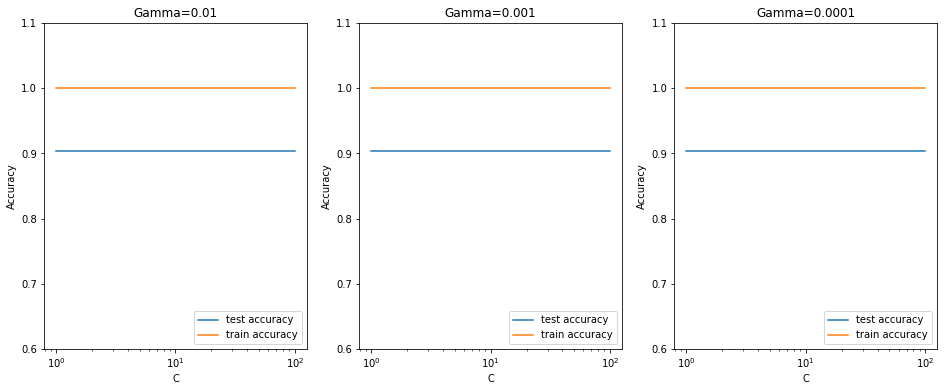

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()


**Observation**<br>
- In all the values of `C` and `gamma`, results are exactly the same in case of `Linear Kernel`. 
- Also, Training accuracy is 100% in all the cases and testing accuracy is quite low 90%. So, there is a possibility of overfitting in these cases
- So, I've tried with `rbf kernel` below to see if we can get better result.

***Trying to find optimal value of gamma in rbf kernel***

In [ ]:
# Trying differenet values of gamma

from sklearn import svm
from sklearn import metrics

# gamma=0.00001 -> 17.9%
# gamma=0.00004 -> 11.5%
# gamma=0.000001 -> 89%
# gamma=0.000004 -> 24%
# gamma=0.0000001 -> 91.5%
# gamma=0.0000004 -> 93.9%
# gamma=0.00000001 -> 85.9%
# gamma=0.00000004 -> 89.4%
# gamma=0.000000001 -> 0.469%
# gamma=0.000000004 -> 79.7%

# model
# svm_final = svm.SVC(kernel='rbf')
svm_final = svm.SVC(kernel='rbf', C=10, gamma=0.0000004)

# fit
svm_final.fit(X_train, y_train)

predictions = svm_final.predict(X_test)

confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy)

0.9436666666666667


**GridSearch to find optimal `C` and `gamma` in `rbf kernel`**

In [ ]:
# Taking 7 mins to run

# gamma=0.00001 -> 17.9%
# gamma=0.00004 -> 11.5%
# gamma=0.000001 -> 89%
# gamma=0.000004 -> 24%
# gamma=0.0000001 -> 91.5%
# gamma=0.0000004 -> 93.9%
# gamma=0.00000001 -> 85.9%
# gamma=0.00000004 -> 89.4%
# gamma=0.000000001 -> 0.469%
# gamma=0.000000004 -> 79.7%

# conduct (grid search) cross-validation to find the optimal values of cost C and the choice of kernel
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# parameters = {'C':[1, 10, 100], 'gamma': [1e-2, 1e-3, 1e-4]} # for linear

parameters = {'C':[1, 10, 100], 'gamma': [0.00004, 0.000004, 0.0000004, 0.00000004]} # for rbf

# instantiate a model 
# svc_grid_search = svm.SVC(kernel="linear")

svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy', return_train_score=True, n_jobs=-1)

# fit
clf.fit(X_train, y_train)
# clf.fit(X_train_full, y_train_full)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'gamma': [4e-05, 4e-06, 4e-07, 4e-08]},
             return_train_score=True, scoring='accuracy')

In [ ]:
import pandas as pd

# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        6.465750      0.426834         2.196780        0.338634       1   
1        6.661878      0.237250         1.737253        0.078338       1   
2        2.628108      0.377719         1.182584        0.113464       1   
3        1.713542      0.072911         1.251839        0.288388       1   
4        7.050692      1.344736         2.753289        1.162953      10   
5        7.382254      0.946870         2.640899        1.252418      10   
6        2.879199      0.505357         1.712775        0.630579      10   
7        1.151189      0.233431         0.880293        0.204964      10   
8       10.720591      1.111173         2.812851        0.431757     100   
9        7.116035      1.310356         2.387913        0.584176     100   
10       2.673813      0.440879         1.350311        0.247465     100   
11       1.016106      0.203714         0.815791        0.229392     100   

   param_gamma                      params  split0_test_score  \
0      0.00004    {'C': 1, 'gamma': 4e-05}           0.113333   
1     0.000004    {'C': 1, 'gamma': 4e-06}           0.251667   
2          0.0    {'C': 1, 'gamma': 4e-07}           0.940000   
3          0.0    {'C': 1, 'gamma': 4e-08}           0.908333   
4      0.00004   {'C': 10, 'gamma': 4e-05}           0.113333   
5     0.000004   {'C': 10, 'gamma': 4e-06}           0.270000   
6          0.0   {'C': 10, 'gamma': 4e-07}           0.943333   
7          0.0   {'C': 10, 'gamma': 4e-08}           0.920000   
8      0.00004  {'C': 100, 'gamma': 4e-05}           0.113333   
9     0.000004  {'C': 100, 'gamma': 4e-06}           0.270000   
10         0.0  {'C': 100, 'gamma': 4e-07}           0.943333   
11         0.0  {'C': 100, 'gamma': 4e-08}           0.921667   

    split1_test_score  split2_test_score  ...  mean_test_score  \
0            0.113333           0.113333  ...         0.113000   
1            0.250000           0.250000  ...         0.256667   
2            0.923333           0.965000  ...         0.946000   
3            0.881667           0.920000  ...         0.910000   
4            0.113333           0.113333  ...         0.113000   
5            0.263333           0.261667  ...         0.272000   
6            0.918333           0.966667  ...         0.946667   
7            0.913333           0.950000  ...         0.930667   
8            0.113333           0.113333  ...         0.113000   
9            0.263333           0.261667  ...         0.272000   
10           0.918333           0.966667  ...         0.946667   
11           0.906667           0.948333  ...         0.927000   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.000667               10            1.000000            1.000000   
1         0.007674                9            1.000000            1.000000   
2         0.014322                3            0.995000            0.995833   
3         0.014870                6            0.937500            0.938333   
4         0.000667               10            1.000000            1.000000   
5         0.009031                7            1.000000            1.000000   
6         0.016228                1            1.000000            1.000000   
7         0.012850                4            0.988333            0.991250   
8         0.000667               10            1.000000            1.000000   
9         0.009031                7            1.000000            1.000000   
10        0.016228                1            1.000000            1.000000   
11        0.013719                5            1.000000            1.000000   

    split2_train_score  split3_train_score  split4_train_score  \
0             1.000000            1.000000            1.000000   
1             1.000000            1.000000            1.000000   
2             0.995833            0.995833            0.995417   
3             0.93

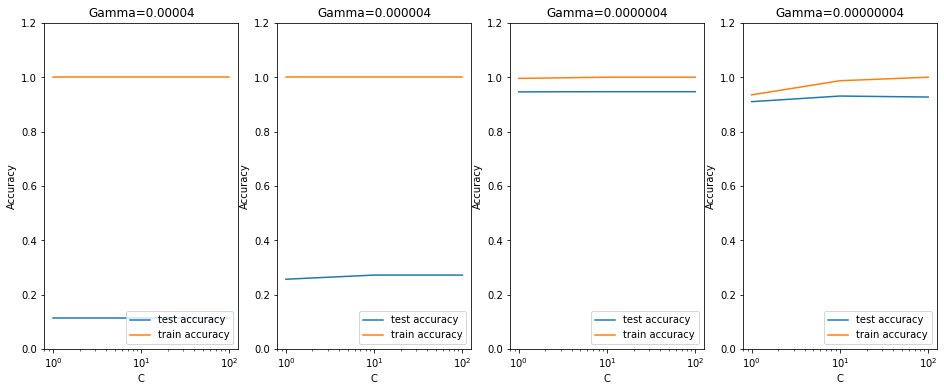

In [ ]:
import matplotlib.pyplot as plt

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/4
plt.subplot(141)
# gamma_01 = cv_results[cv_results['param_gamma']==0.01]
gamma_00004 = cv_results[cv_results['param_gamma']==0.00004]

plt.plot(gamma_00004["param_C"], gamma_00004["mean_test_score"])
plt.plot(gamma_00004["param_C"], gamma_00004["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.00004")
# plt.ylim([0.60, 1])
plt.ylim([0, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/4
plt.subplot(142)
# gamma_001 = cv_results[cv_results['param_gamma']==0.001]
gamma_000004 = cv_results[cv_results['param_gamma']==0.000004]

plt.plot(gamma_000004["param_C"], gamma_000004["mean_test_score"])
plt.plot(gamma_000004["param_C"], gamma_000004["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.000004")
# plt.ylim([0.60, 1])
plt.ylim([0, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/4
plt.subplot(143)
# gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
gamma_0000004 = cv_results[cv_results['param_gamma']==0.0000004]

plt.plot(gamma_0000004["param_C"], gamma_0000004["mean_test_score"])
plt.plot(gamma_0000004["param_C"], gamma_0000004["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0000004")
# plt.ylim([0.60, 1])
plt.ylim([0, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 4/4
plt.subplot(144)
# gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
gamma_00000004 = cv_results[cv_results['param_gamma']==0.00000004]

plt.plot(gamma_00000004["param_C"], gamma_00000004["mean_test_score"])
plt.plot(gamma_00000004["param_C"], gamma_00000004["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.00000004")
# plt.ylim([0.60, 1])
plt.ylim([0, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

**Observation**<br>
From the plot above, we can observe that (from higher to lower gamma / left to right):

- At gamma values (0.00004, 0.000004, 0.0000004), the model is achieving 100% accuracy on the training data, though the test score is quite low (<11%). Thus, the model is overfitting.

- At gamma=0.00000004, the training and test scores are comparable at around C=1, C=10 though the model starts to overfit at higher values of C=100

- At gamma=0.00000004, the model does not overfit till C=10 but starts showing signs at C=100. Also, the training and test scores are slightly lower than at gamma=0.0000004.

- **Thus, it seems that the best combination is gamma=0.00000004 and C=10{'C': 10, 'gamma': 4e-08} (the plot at the end), which gives the highest test accuracy (~93%) while avoiding overfitting.**

Let's now build the final model and see the performance on test data.

In [91]:
# optimal hyperparameters
best_C = 10
best_gamma = 0.00000004

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(X_train, y_train)

SVC(C=10, gamma=4e-08)

In [92]:
# predict
predictions = svm_final.predict(X_test)
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

In [93]:
# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print("Test Accuracy in Final SVM: " + str(test_accuracy) + "\n")
print("Confusion Matrix in Final SVM")
print(confusion)
print("\n")

print("Metrics report in Final SVM")
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

Test Accuracy in Final SVM: 0.916

Confusion Matrix in Final SVM
[[290   0   2   1   1   0   1   0   1   1]
 [  0 340   1   2   0   1   1   1   0   0]
 [  0   6 292   5   2   0   1   3   3   0]
 [  1   2   6 249   0  10   0   6   3   2]
 [  1   1   2   0 261   0   3   1   0  12]
 [  2   3   0  12   0 237   3   1   4   3]
 [  5   0   8   0   4   3 269   1   0   0]
 [  0   7   5   1   2   1   1 266   2  18]
 [  0   3   1   8   5  16   3   3 257   5]
 [  2   4   1   4  18   1   0   8   1 287]]


Metrics report in Final SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       297
           1       0.93      0.98      0.96       346
           2       0.92      0.94      0.93       312
           3       0.88      0.89      0.89       279
           4       0.89      0.93      0.91       281
           5       0.88      0.89      0.89       265
           6       0.95      0.93      0.94       290
           7       0.92      0.88      0.